In [1]:
import pandas as pd
df = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7.csv")

In [2]:
df.head()

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['time'], df['co2'], test_size=0.10, shuffle=False)

In [5]:
# print(X_train)
# print(X_test)
# print(Y_train)
# print(Y_test)

In [18]:
import numpy as np
train_data = []
test_data = []
for x in X_train:
    train_data.append(x)
    test_data.append(np.nan)
for x in X_test:
    train_data.append(np.nan)
    test_data.append(x)

train_data_y = []
test_data_y = []
for y in Y_train:
    train_data_y.append(y)
    test_data_y.append(np.nan)
for y in Y_test:
    train_data_y.append(np.nan)
    test_data_y.append(y)

In [7]:
len(test_data) == len(train_data)

True

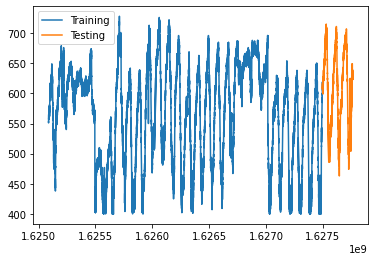

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(X_train, Y_train, label="Training")
plt.plot(X_test, Y_test, label="Testing")
plt.legend()
plt.show()

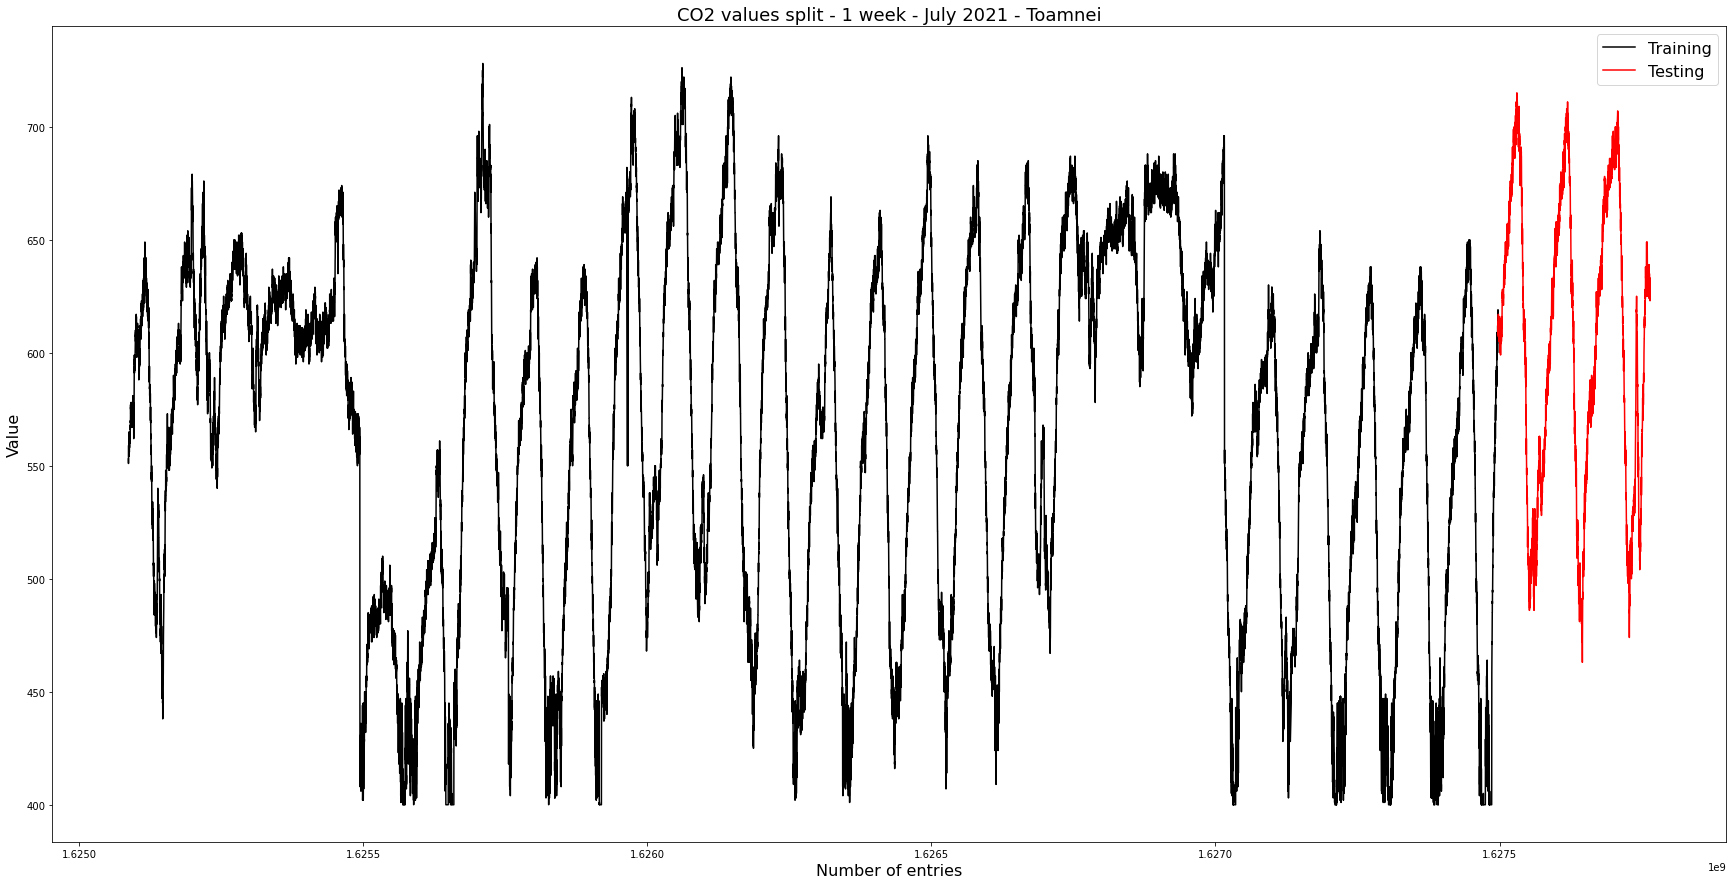

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(X_train, Y_train, color = 'black', label= 'Training')
plt.plot(X_test, Y_test, color = 'red', label = 'Testing')
# plt.plot(x_test, y_pred, color = 'red', label = 'Forest Regression with GS')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('CO2 values split - 1 week - July 2021 - Toamnei', fontsize=18)
plt.xlabel('Number of entries', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_ARD.jpg', bbox_inches = 'tight')
plt.show()

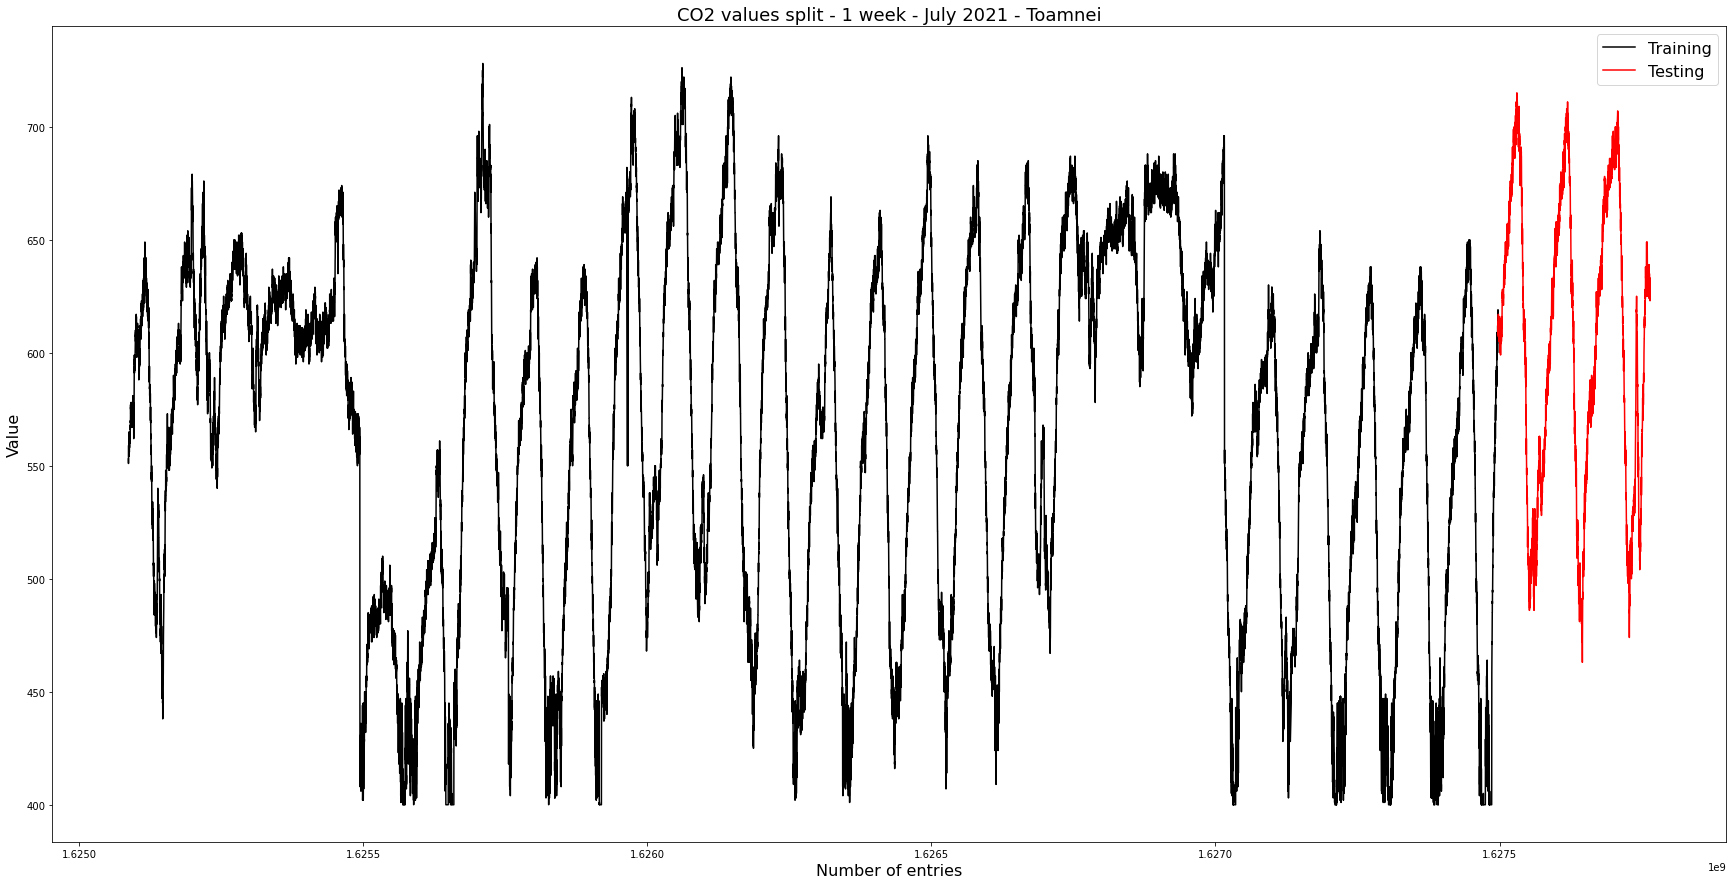

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(train_data, train_data_y, color = 'black', label= 'Training')
plt.plot(test_data, test_data_y, color = 'red', label = 'Testing')
# plt.plot(x_test, y_pred, color = 'red', label = 'Forest Regression with GS')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('CO2 values split - 1 week - July 2021 - Toamnei', fontsize=18)
plt.xlabel('Number of entries', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_ARD.jpg', bbox_inches = 'tight')
plt.show()

In [27]:
#{'bootstrap': True, 'max_depth': 55, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 600}
from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600).fit(train_data, train_data_y)
clf = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600)
clf.fit(train_data,train_data_y)
y_pred = clf.predict(test_data)

ValueError: Expected 2D array, got 1D array instead:
array=[1.6250868e+09 1.6250868e+09 1.6250870e+09 ...           nan           nan
           nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.